# <center> Machine Learning Based Approach to Predict Attacks on Industrial Control Systems </center>

## Problem Definition
Detecting /Predicting attacks on industrial systems using Machine Learning techniques.

## Project Outline 
- Apply machine learning techniques to predict attacks on industrial systems using HAI time series dataset.
- Evaluate and analyze dataset time series aspects ( stationary , seasonality ,etc ) and attributes. 
- Visualize the process using different visualization techniques. 

## HAI Security Dataset 
For this project we will investigate the The HIL-based augmented ICS security (HAI) time series database. The dataset is taken from HIL-based Augmented ICS research page on github.com.
Quoting the project site the HAI dataset was collected from a realistic industiral control system (ICS) testbed augmented with a Hardware-In-the-Loop (HIL) simulator that emulates steam-turbine power generation and pumped-storage hydropower generation.

According to the site also the HAI testbed is comprised the following physical control systems:
1. <b>a GE turbine</b>: Turbine Process (P2): 
2. <b>Emerson boiler</b>: Boiler Process (P1): 
3. <b>FESTO water treatment systems</b>: Water-treatment (P3) 
4. <b>All combined using a hardware-in-the-loop (HIL) simulator</b>: HIL (P4) HIL systems is composed of controller under a test a real time simulator together with IO Modules.
    
<br>
The dataset has multiple channels of measurements (e.g., sensors, actuators, control devices) represent the current status of the systems.

There are two major versions of this dataset. Each version consists of several csv files , and the site claims they satisfy time continuty.

Scenario configuration have been continuosuly developed  as follows:

* <b>Normal Operation</b>: Complex process of the long-term human intervention for normal operations applied.
<br>
<i>Situation</i>: <br>
Through the experiments , normal ranges are confirmed and monitored  even using a scheduled task to generate random values within the normal range.The normal ranges of SP values in which the entire process was stable were determined by experimentally changing the value of each SP.An HMI operation task scheduler was used to periodically set the SPs and HIL simulator.  variables to predefined values within the normal range.


* <b>Abnormal Behaviors</b>:  Realization of the various ICS attacks on real world systems using scalable attack tool followed by labeling of anomalies.

Three ICS are interconnected via HIL simulator that Simulated those complex systems.
<br>
<i>Situation</i>:<br>

Abnormal behavior occurred when some of the parameters were not within the limits of the normal range or were in unexpected states due to attacks, malfunctions, and failures
Attack scenarios have been implemented by considering attack target  for each feed back control loop. 

<i>Attack types</i>: 

-  a. Response Prevention: hiding abnormal response on PV on HMI 
-  b. SP attack: forcing the SP value to indirectly change the CO value 
-  c. CO attack: forcing the CO value directly 

The dataset attributes comprised from the followings:

1. <b>time</b> : This is the first column and it represents the observed local time as “yyyy-MM-dd hh:mm:ss,” while the rest columns provide the recorded SCADA data points - column 01 
2. <b>P1_B2004...P4_HT_LD </b>:  contains data collected from different setpoints in the archeticture
3. <b>attack</b>: provides an info for whether an attack occured or not. Where this is applicable to any attack happening on all the processes.last column.

## Model Proposal & Procedures

The diagram below illustrates our road map :


<img src="images/model-diagram.png" align="center" alt="Model Arch. Diagram"/>
My proposed ML evaluation  can be described as follows:


1. Loading the dataset and starting analyzing the data and the features.

2. Analayze the attributes and understand the process

3. Apply features selection and scaling 

4. Check for Imbalance in the dataset and balance if needed 

5. Time series data test - stationary trend etc 

6. Evaluate Machine Learning Model following this procudere:
  - Plot the data and identify unusual obeservations finding pattern in the data
  - Apply for transformation or differencing to remove trend and stabilize variance 
  - Test for stationary if not then apply another transforamtion or differencing 
  - Plot PACF and ACF to estimate the order of MA or AR process.
  - Try different combination of orders  and select the model with the lowest AIC 
  - Check for residuals - Ljung Box test 
  - Calculate predictions or forecats.




## Packages needed
Uncomment the following line and paste it in to a codebox:

all done via pip
* #!pip install yellowbrick
* #!pip install seaborn
* #!pip install scipy
* #!pip install statsmodels  


## Import Libraries 
Import some of the required libraries 


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
from collections import Counter
from numpy import where
from imblearn.over_sampling import SMOTE


#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance
from sklearn.decomposition import PCA

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm


In [45]:
# Seaborn Styling 
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

## Load the HAI Dataset 

In [46]:
print("Reading the HAI data set===========================================")
hai_data = pd.read_csv('https://raw.githubusercontent.com/icsdataset/hai/master/hai-21.03/test2.csv.gz', compression='gzip',parse_dates=['time'], index_col=['time'])
hai_data.head()

Reading the HAI data set===========================================


,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
time,,,,,,,,,,,,,,,,,,,,,
2020-07-09 15:00:00,0.09874,1.25036,382.21698,1118.61084,32.0,99.98731,2835.65454,35.37903,92.69160,92.51556,...,15844.0,283.92651,293.51129,0,10051.0,27600.0,0,0,0,0
2020-07-09 15:00:01,0.09874,1.24944,382.21698,1118.61084,32.0,100.00000,2832.98731,35.37674,92.64934,92.51556,...,15808.0,283.36591,292.67938,0,10052.0,27600.0,0,0,0,0
2020-07-09 15:00:02,0.09874,1.24746,382.21698,1118.61084,32.0,99.98115,2842.25244,35.37178,92.91075,92.51556,...,15734.0,282.93189,291.90179,0,10052.0,27595.0,0,0,0,0
2020-07-09 15:00:03,0.09874,1.24624,382.21698,1118.61084,32.0,100.00000,2833.12744,35.36873,92.92407,92.51556,...,15710.0,282.06378,291.59430,0,10053.0,27590.0,0,0,0,0
2020-07-09 15:00:04,0.09874,1.24364,382.21698,1118.61084,32.0,100.00000,2839.44482,35.36224,93.05405,92.51556,...,15608.0,283.67334,289.87628,0,10052.0,27588.0,0,0,0,0


In [48]:
hai_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118801 entries, 2020-07-09 15:00:00 to 2020-07-11 00:00:00
Data columns (total 83 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   P1_B2004     118801 non-null  float64
 1   P1_B2016     118801 non-null  float64
 2   P1_B3004     118801 non-null  float64
 3   P1_B3005     118801 non-null  float64
 4   P1_B4002     118801 non-null  float64
 5   P1_B4005     118801 non-null  float64
 6   P1_B400B     118801 non-null  float64
 7   P1_B4022     118801 non-null  float64
 8   P1_FCV01D    118801 non-null  float64
 9   P1_FCV01Z    118801 non-null  float64
 10  P1_FCV02D    118801 non-null  float64
 11  P1_FCV02Z    118801 non-null  float64
 12  P1_FCV03D    118801 non-null  float64
 13  P1_FCV03Z    118801 non-null  float64
 14  P1_FT01      118801 non-null  float64
 15  P1_FT01Z     118801 non-null  float64
 16  P1_FT02      118801 non-null  float64
 17  P1_FT02Z     118801 non-null  flo

Looking at the dataset above , we can see there are different attributes with different scales on the data


### Identifying Important Attributes 

So before we work on the dataset attributes and apply our models we need to prepare the dataset. Since our attacks scenarios involved attacking specific controllers that changes different set points we noticed the followings:
1. The attacks conducted according to the technical details provided for that period of time are targeting specific controllers. Those controllers influence the target points vlaue we seen in the dataset. 

Conclusion : Leaving only those features for that period of time specificed could potentialy used as predictor

<img src="images/attack-july09.png" align="center" alt="Attack Scenarios" width="500"/>
<img src="images/attack-july10.png" align="center" alt="Attack Scenarios" width="500"/>

Using those attribute and setpoints will be the focus of our dataset.Since our dataset will comprise of those Target points. This will introduce the number of features that we need to work with and make data cleaning is more easier.
Our dataset now will become 

In [68]:
hai_data_attk = hai_data[['P1_B2016','P1_PIT01','P1_LCV01D','P1_B3005','P1_FT03','P1_FCV03D','P1_B3004','P1_PCV01D','P2_SIT01','P1_LIT01','P2_CO_rpm','P3_LCP01D','P1_LCV01D','attack','attack_P1']]

In [69]:
hai_data_attk.to_csv('dataset/attack_data.csv')

In [70]:
hai_data_attk.head()

,P1_B2016,P1_PIT01,P1_LCV01D,P1_B3005,P1_FT03,P1_FCV03D,P1_B3004,P1_PCV01D,P2_SIT01,P1_LIT01,P2_CO_rpm,P3_LCP01D,P1_LCV01D,attack,attack_P1
time,,,,,,,,,,,,,,,
2020-07-09 15:00:00,1.25036,1.35437,13.97231,1118.61084,315.48346,69.76647,382.21698,83.46329,774.0,384.30737,54065.0,136,13.97231,0,0
2020-07-09 15:00:01,1.24944,1.35437,13.93358,1118.61084,315.10199,69.74272,382.21698,83.40041,773.0,384.30737,54073.0,136,13.93358,0,0
2020-07-09 15:00:02,1.24746,1.35513,13.95248,1118.61084,316.05570,69.77000,382.21698,83.34054,773.0,384.20517,54073.0,136,13.95248,0,0
2020-07-09 15:00:03,1.24624,1.35513,13.89971,1118.61084,315.10199,69.70607,382.21698,83.26884,777.0,384.25626,54086.0,136,13.89971,0,0
2020-07-09 15:00:04,1.24364,1.35437,13.94603,1118.61084,315.48346,69.76971,382.21698,83.18826,778.0,384.20517,54086.0,136,13.94603,0,0


In [71]:
hai_data_attk.info()
print("Shape ===>",hai_data_attk.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118801 entries, 2020-07-09 15:00:00 to 2020-07-11 00:00:00
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   P1_B2016   118801 non-null  float64
 1   P1_PIT01   118801 non-null  float64
 2   P1_LCV01D  118801 non-null  float64
 3   P1_B3005   118801 non-null  float64
 4   P1_FT03    118801 non-null  float64
 5   P1_FCV03D  118801 non-null  float64
 6   P1_B3004   118801 non-null  float64
 7   P1_PCV01D  118801 non-null  float64
 8   P2_SIT01   118801 non-null  float64
 9   P1_LIT01   118801 non-null  float64
 10  P2_CO_rpm  118801 non-null  float64
 11  P3_LCP01D  118801 non-null  int64  
 12  P1_LCV01D  118801 non-null  float64
 13  attack     118801 non-null  int64  
 14  attack_P1  118801 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 14.5 MB
Shape ===> (118801, 15)


Now we end up with 17 Columns that is more manageable  and easier to work with.

## Data Cleaning 

So before we visualize the dataset attributes and apply our models we need to clean the dataset. For example , its important to remove features that can cause clutters which are features with single value.

In [72]:
# Let's look in to identifying all the null values from the attributes
hai_data_attk.isna().sum()

P1_B2016     0
P1_PIT01     0
P1_LCV01D    0
P1_B3005     0
P1_FT03      0
P1_FCV03D    0
P1_B3004     0
P1_PCV01D    0
P2_SIT01     0
P1_LIT01     0
P2_CO_rpm    0
P3_LCP01D    0
P1_LCV01D    0
attack       0
attack_P1    0
dtype: int64

## Understanding the Data
We will start by using Descriptive Statistics in Data Exploration. This is used to so we can  take a closer look at our loaded data.

### Descriprtive statistics
Let’s summarize the distribution of each attribute.

In [73]:
hai_data_attk.describe().T

,count,mean,std,min,25%,50%,75%,max
P1_B2016,118801.0,1.395836,0.128718,1.03394,1.32271,1.39155,1.46739,1.99702
P1_PIT01,118801.0,1.386082,0.073331,0.09781,1.36429,1.38336,1.39709,2.41943
P1_LCV01D,118801.0,12.345037,4.812710,0.00000,9.62797,13.11805,13.94771,97.00000
P1_B3005,118801.0,1066.996483,43.182916,994.63568,1001.99799,1085.58936,1094.34485,1118.61084
P1_FT03,118801.0,285.119269,25.315659,120.17726,248.15624,296.21991,301.36957,351.21292
P1_FCV03D,118801.0,58.676109,5.307163,32.63621,52.01071,60.67887,61.72814,91.43527
P1_B3004,118801.0,398.345730,10.159895,382.21698,396.06302,396.06302,405.69220,423.35199
P1_PCV01D,118801.0,67.740877,19.890980,0.00000,49.75690,67.29684,84.54195,100.00000
P2_SIT01,118801.0,781.593362,33.335821,0.00000,780.00000,784.00000,786.00000,895.00000
P1_LIT01,118801.0,398.866841,13.557286,162.61324,394.78638,397.64893,405.77649,552.07324


In [74]:
hai_data_attk.corr(method='pearson')

,P1_B2016,P1_PIT01,P1_LCV01D,P1_B3005,P1_FT03,P1_FCV03D,P1_B3004,P1_PCV01D,P2_SIT01,P1_LIT01,P2_CO_rpm,P3_LCP01D,P1_LCV01D,attack,attack_P1
P1_B2016,1.000000,0.079325,-0.015802,-0.071360,-0.063947,-0.059313,0.033029,0.145288,-0.038793,0.032857,-0.046928,-0.539624,-0.015802,0.001402,0.006943
P1_PIT01,0.079325,1.000000,-0.349223,-0.256330,-0.262744,-0.252560,0.056068,-0.040903,0.009991,0.004231,0.016660,0.020871,-0.349223,0.005424,0.004005
P1_LCV01D,-0.015802,-0.349223,1.000000,0.422931,0.430539,0.486693,-0.016127,0.221139,0.009552,-0.351887,-0.015416,-0.023823,1.000000,0.283747,0.337706
P1_B3005,-0.071360,-0.256330,0.422931,1.000000,0.991216,0.899078,-0.095569,0.698281,0.012616,-0.045306,-0.035975,0.009993,0.422931,0.021657,0.013714
P1_FT03,-0.063947,-0.262744,0.430539,0.991216,1.000000,0.898038,-0.091579,0.701788,0.010766,-0.026296,-0.037966,0.003442,0.430539,0.024129,0.014762
P1_FCV03D,-0.059313,-0.252560,0.486693,0.899078,0.898038,1.000000,-0.346247,0.670264,0.003774,-0.320988,-0.039883,0.007540,0.486693,0.000678,0.003370
P1_B3004,0.033029,0.056068,-0.016127,-0.095569,-0.091579,-0.346247,1.000000,-0.100483,-0.007719,0.738642,0.000463,-0.014326,-0.016127,0.022089,-0.026654
P1_PCV01D,0.145288,-0.040903,0.221139,0.698281,0.701788,0.670264,-0.100483,1.000000,-0.016500,-0.020009,-0.053687,-0.024982,0.221139,-0.004186,-0.016979
P2_SIT01,-0.038793,0.009991,0.009552,0.012616,0.010766,0.003774,-0.007719,-0.016500,1.000000,-0.011574,0.949825,0.070444,0.009552,-0.107181,0.013488
P1_LIT01,0.032857,0.004231,-0.351887,-0.045306,-0.026296,-0.320988,0.738642,-0.020009,-0.011574,1.000000,-0.004875,-0.020924,-0.351887,-0.111341,-0.171784


### Correlation matrix plot


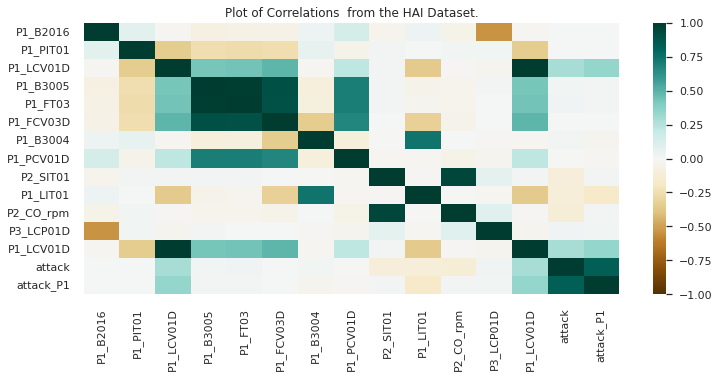

In [75]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.heatmap(hai_data_attk.corr() ,  vmin=-1, vmax=1, cmap='BrBG' , ax=ax)
ax.set_title('Plot of Correlations  from the HAI Dataset.')
plt.show()

Its looks like manny more attributes are correlated to each other.The dark brown  colors around the bottom right diagnoal show more correlation while the white to green show some moderate negative correlation in different  areas. Seaborn has a better implementation of heat maps to show data correlation which can be done as follows:

## Statistical Analysis Visualization

### 1. Uni-variate Analysis
The goal is to select those features that have the strongest relationship with the output variable in addition to understand the distribution of the attributes.It allows you to describe patterns and get an idea of the distribution found in univariate data include.

####  1.1 Univariate Data Plots

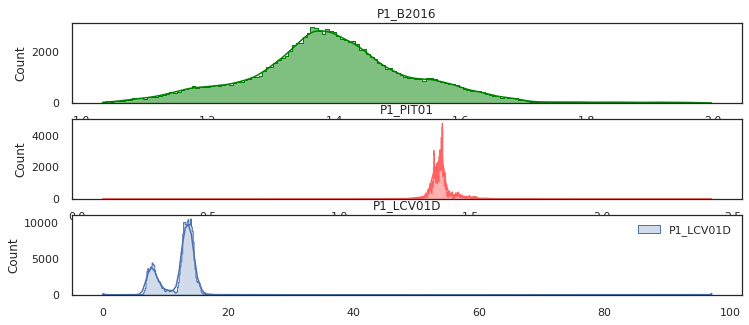

In [57]:
sns.set(style="white")
fig, axs = plt.subplots(3, 1, figsize=(12, 5))
sns.histplot(hai_data_attk.P1_B2016,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("P1_B2016")
sns.histplot(hai_data_attk.P1_PIT01,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_PIT01")
sns.histplot(hai_data_attk.P1_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("P1_LCV01D")
plt.show()

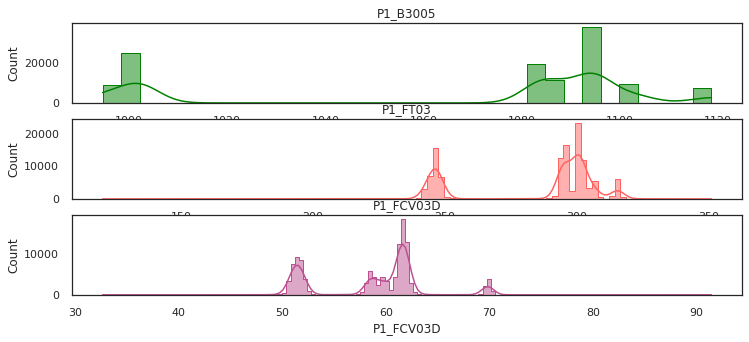

In [58]:
sns.set(style="white")
fig, axs = plt.subplots(3, 1, figsize=(12, 5))
sns.histplot(hai_data_attk.P1_B3005,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("P1_B3005")
sns.histplot(hai_data_attk.P1_FT03,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_FT03")
sns.histplot(hai_data_attk.P1_FCV03D,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("P1_FCV03D")
plt.show()

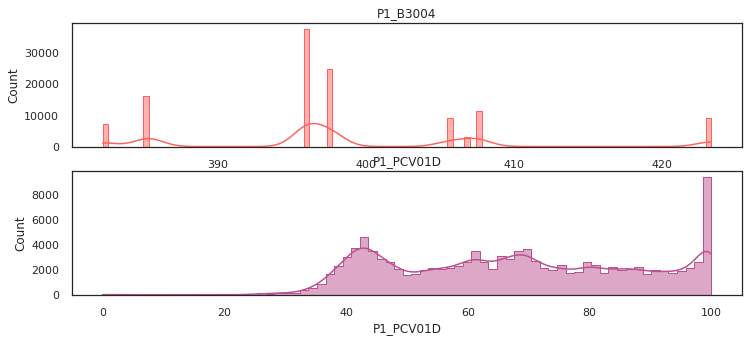

In [59]:
sns.set(style="white")
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
sns.histplot(hai_data_attk.P1_B3004,  element="step", color="#ff6361",kde=True, ax=axs[0]).set_title("P1_B3004")
sns.histplot(hai_data_attk.P1_PCV01D,  element="step",color="#bc5090", kde=True,ax=axs[1] ).set_title("P1_PCV01D")
plt.show()

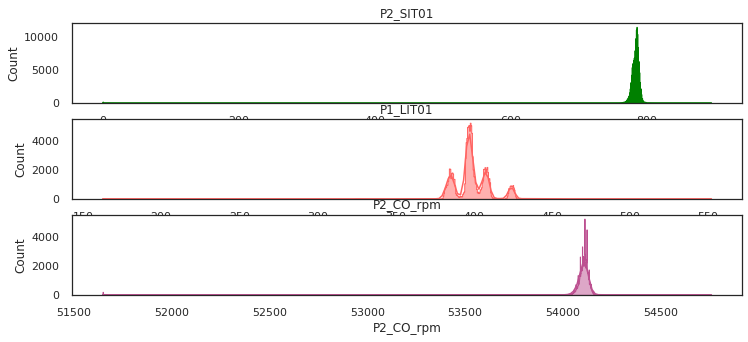

In [60]:
sns.set(style="white")
fig, axs = plt.subplots(3, 1, figsize=(12, 5))
sns.histplot(hai_data_attk.P2_SIT01,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("P2_SIT01")
sns.histplot(hai_data_attk.P1_LIT01,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_LIT01")
sns.histplot(hai_data_attk.P2_CO_rpm,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("P2_CO_rpm")

plt.show()

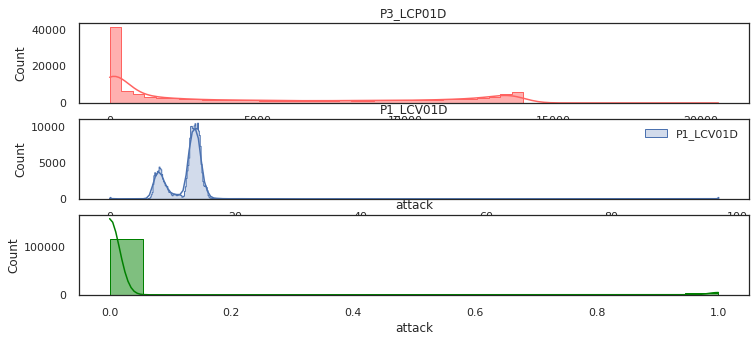

In [61]:
sns.set(style="white")
fig, axs = plt.subplots(3, 1, figsize=(12, 5))
sns.histplot(hai_data_attk.P3_LCP01D,  element="step", color="#ff6361",kde=True, ax=axs[ 0]).set_title("P3_LCP01D")
sns.histplot(hai_data_attk.P1_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[1] ).set_title("P1_LCV01D")
sns.histplot(hai_data_attk.attack,  element="step",color="green", kde=True, ax=axs[2] ).set_title("attack")
plt.show()

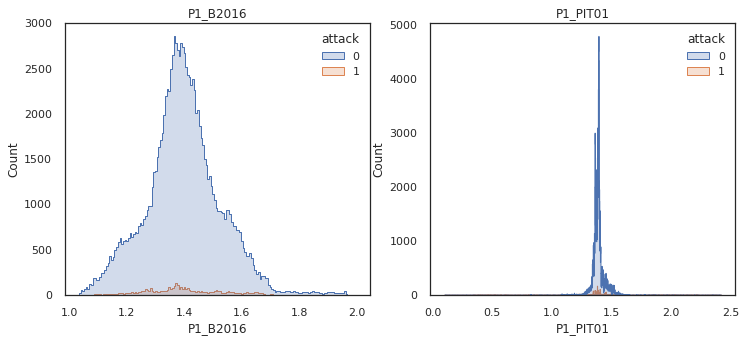

In [62]:
sns.set(style="white")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=hai_data_attk,x="P1_B2016",hue="attack",element="step",color="green",fill=True,ax=axs[0] ).set_title("P1_B2016")
sns.histplot(data=hai_data_attk,x="P1_PIT01",hue="attack",element="step",color="#ff6361",fill=True,ax=axs[1]).set_title("P1_PIT01")
plt.show()

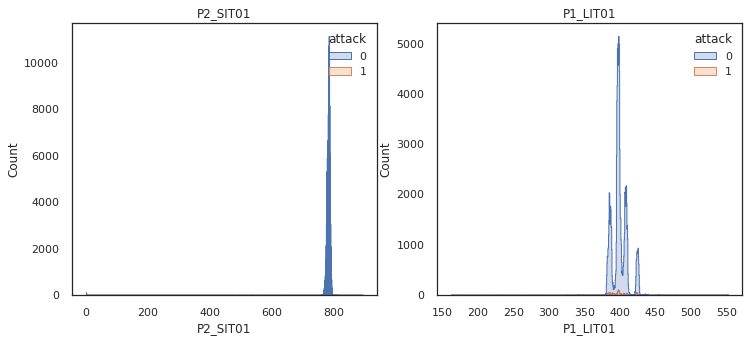

In [63]:
sns.set(style="white")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=hai_data_attk,x="P2_SIT01",hue="attack",element="step",color="green",fill=True,ax=axs[0] ).set_title("P2_SIT01")
sns.histplot(data=hai_data_attk,x="P1_LIT01",hue="attack",element="step",color="#ff6361",fill=True,ax=axs[1]).set_title("P1_LIT01")
plt.show()

### Multi-variate Analysis

We look at heatmap based on our partition models to look closely in to the correlation between group with the similar types.

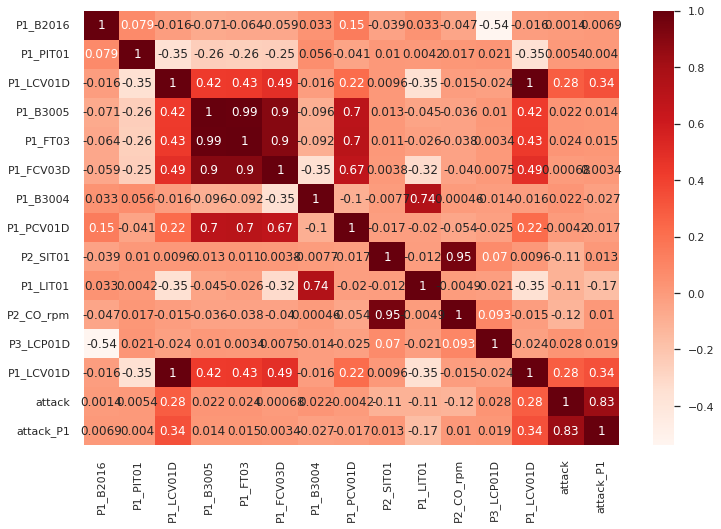

In [76]:
fig, ax = plt.subplots(1,  figsize=(12, 8))
sns.heatmap(hai_data_attk.corr(), annot=True, cmap=plt.cm.Reds, ax=ax)
plt.show()

Strong correlation as you go to upper  left corner of the correlation plot.


### Exploratory Data Analysis (EDA)
We plot the number of occurance of attacks over the entire time period of our dataset.

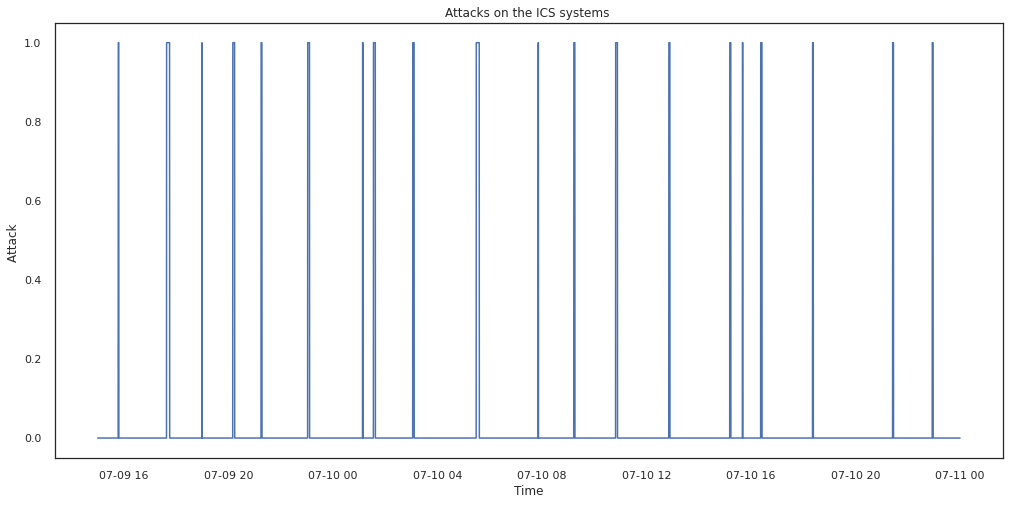

In [65]:
plt.figure(figsize=(17, 8))
plt.plot(hai_data_attk.attack)
plt.title('Attacks on the ICS systems ')
plt.ylabel('Attack ')
plt.xlabel('Time')
plt.grid(False)
plt.show()

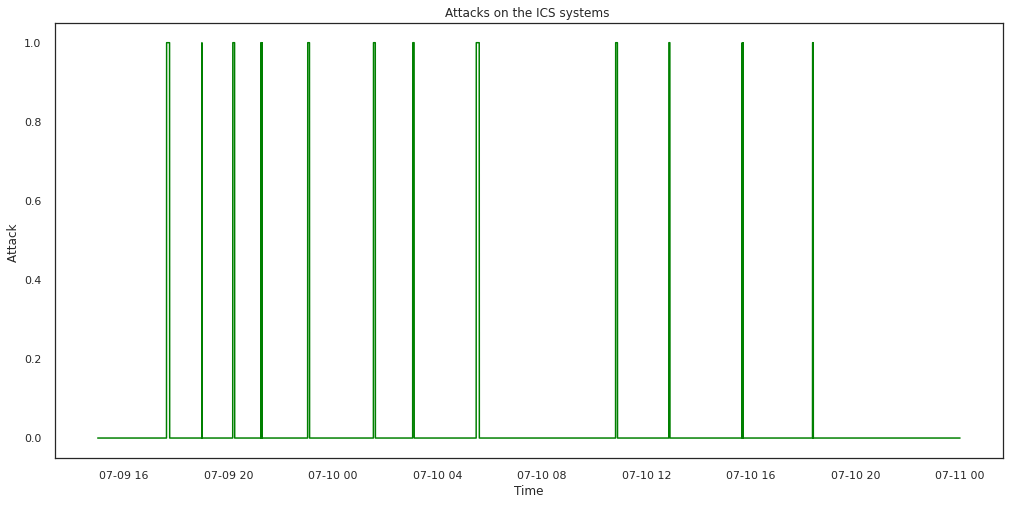

In [83]:
plt.figure(figsize=(17, 8))
plt.plot(hai_data_attk.attack_P1 , color='green', linestyle='-')
plt.title('Attacks on the ICS systems ')
plt.ylabel('Attack ')
plt.xlabel('Time')
plt.grid(False)
plt.show()

#### Adjusting Trend and Seasonality

Since, this is a time series dataset  its all done with a date or DateTime, you may easily select increments by time intervals that make sense


#### 1. Explore Daily attacks Data

#### 2. Explore Hourly Attacks Data

In [33]:
hai_data_attk[::6]
hai_data_attk.head()
hai_data_attk.shape


,P1_B2016,P1_PIT01,P1_LCV01D,P1_B3005,P1_FT03,P1_FCV03D,P1_B3004,P1_PCV01D,P2_SIT01,P1_LIT01,P2_CO_rpm,P3_LCP01D,P1_LCV01D,attack
time,,,,,,,,,,,,,,
2020-07-09 15:00:00,1.25036,1.35437,13.97231,1118.61084,315.48346,69.76647,382.21698,83.46329,774.0,384.30737,54065.0,136,13.97231,0
2020-07-09 15:00:06,1.23739,1.35437,13.88320,1118.61084,315.48346,69.71966,382.21698,83.01798,775.0,384.30737,54065.0,136,13.88320,0
2020-07-09 15:00:12,1.23922,1.38107,13.87155,1118.61084,315.86493,69.75640,382.21698,82.54231,767.0,384.20517,54086.0,144,13.87155,0
2020-07-09 15:00:18,1.27737,1.38413,13.85772,1118.61084,315.67422,69.67644,382.21698,82.41615,777.0,383.74509,54046.0,160,13.85772,0
2020-07-09 15:00:24,1.32574,1.38489,14.00640,1118.61084,314.33914,69.79864,382.21698,82.42754,774.0,383.33615,54095.0,168,14.00640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-10 23:59:36,1.34239,1.38336,8.22789,1001.99799,246.24898,51.44880,397.63785,39.97798,777.0,395.65537,54094.0,4080,8.22789,0
2020-07-10 23:59:42,1.33262,1.38413,8.34437,1001.99799,246.43968,51.47036,397.63785,39.78766,778.0,395.65537,54105.0,6472,8.34437,0
2020-07-10 23:59:48,1.32286,1.38260,8.48527,1001.99799,245.86751,51.53541,397.63785,39.59117,782.0,395.29755,54132.0,8424,8.48527,0


In [ ]:
date_time = pd.to_Datetime(hai_data_attk.pop('time'), format='%Y-%m-%d %H:%M:%S')

## Data Scaling

Data is comprised of attributes  with varying scales. Its useful for optimizing your algorithms. We will apply standard scalers on the gaussian features and apply normalization on the non gaussian features. 

### Applying Standard Scaler
Standardization is a scaling technique where we transform the features shape closely to be normally distributed. 

In [91]:
array = hai_data_attk.values
Xs = array[0:12]
Y1s = array[:,13]
Y2s = array[:,14]

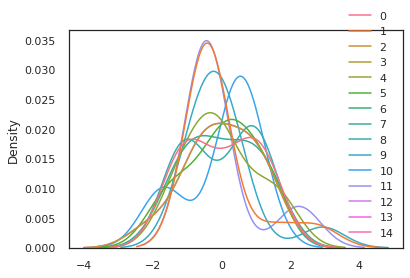

In [98]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(Xs)
scaled = pd.DataFrame(scaled )

sns.kdeplot(data=scaled)
plt.show()

### Applying PCA 
Principal Compnonet Analysis PCA works by finding the eigenvectors and eigenvalues of the covariance matrix of the dataset. The Eigenvectors are called as the “Principal Components” of the dataset.

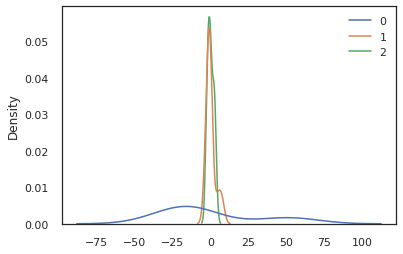

In [105]:
pca_scaler = PCA(n_components=3)
pca_scaled = pca_scaler.fit_transform(Xs)
pca_scaled = pd.DataFrame(pca_scaled )
sns.kdeplot(data=pca_scaled)
plt.show()

## Addressing Imblanace in the Dataset 

Imbalanced classification involves a dataset where the class distribution is not equal.

In [28]:
hai_data_attk.shape
hai_data_attk['attack'].value_counts()

0    115352
1      3449
Name: attack, dtype: int64

Counter({0.0: 115352, 1.0: 3449})


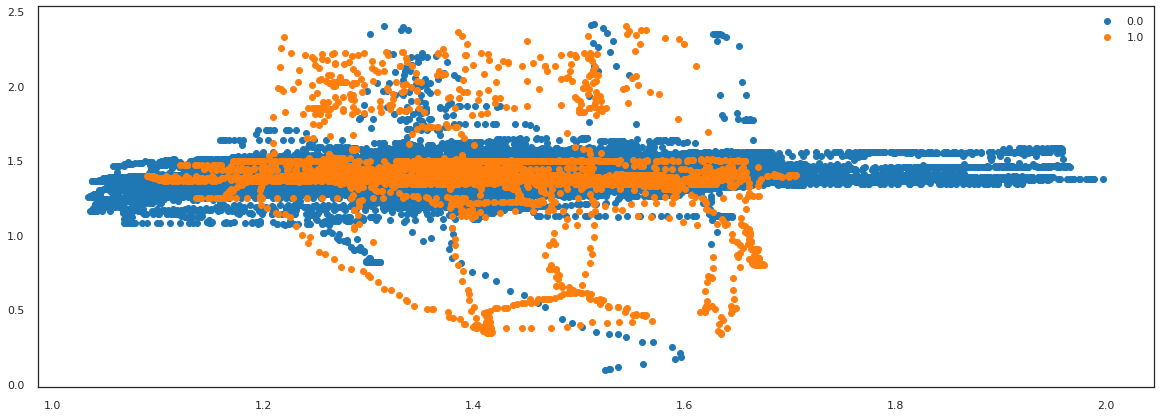

In [29]:
array  = hai_data_attk.values

X = array[:,:-1]
y = array[:,-1]

counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({0.0: 115352, 1.0: 115352})


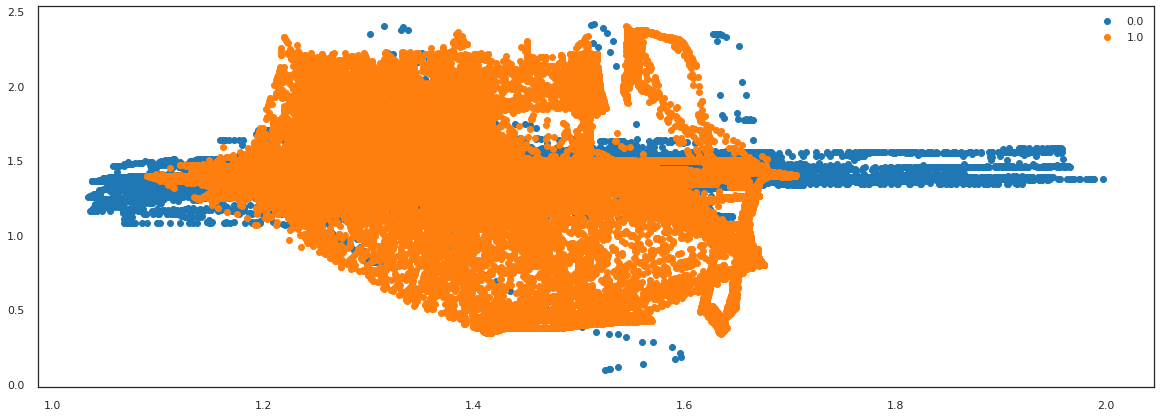

In [30]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#summarize the new class distribution

counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Autoregressive Model
Autoregresssive model is very flexible and can be used to model different types of time series patterns.
It can only be applied to stationary time series so we will have to test for stationary and convery non stationary items before applying the model.<br>
<b>ADF (Augmented Dickey Fuller) Test</b>

The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not.
First of all, we’re going to check whether each column of the data is stationary or not using the ADF (Augmented-Dickey Fuller) test. The ADF test provides us with a p-value which we can use to find whether the data is Stationary or not. If the p-value is less than the significance level then the data is stationary, or else the data is non-stationary.


In [107]:
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result


The test results show that all the columns in the data are non-stationary. So we need to convert the non-stationary data into stationary data.

## Vector Auto Regression (VAR)
In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables. Creating a validation set for time series problems is tricky because we have to take into account the time component. One cannot directly use the train_test_split or k-fold validation since this will disrupt the pattern in the series. The validation set should be created considering the date and time values.